In [104]:
# Import all dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [105]:
# Get the holiday names
def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"
    
# Get the holidays from Calendar

dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())    
    

In [106]:
# Read the  csv
df = pd.read_csv( "spaceship_earth.csv")

# Cleanup the data to remove blank times and -999 for unavaiable data
df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]


In [107]:
# Data functions for date and datetime fields for further calculations
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create Time percentage as a feature
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

# Convert date field in meaningful features

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))


    
# Scale the data by bringing them as max 1
df['month'] = df['month'] / 12.0
df['day'] = df['day'] / 31.0
df['dayofweek'] = df['dayofweek'] / 6.0 
df['dayofyear'] = df['dayofyear'] / 366.0
df['weekofyear'] = df['weekofyear'] / 53.0
df['quarter'] = df['quarter'] / 4.0    


# Find if a date was a holiday

df['Holiday'] = df['date'].isin(holidays)
df['holidaynames'] = df['date'].apply(lambda row: us_holidays.get(row))


In [108]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames'],
      dtype='object')

In [109]:
df = pd.get_dummies(df, columns=['holidaynames'])

In [110]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames_Christmas Day', 'holidaynames_Christmas Day (Observed)',
       'holidaynames_Columbus Day', 'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')

In [112]:
print(df.shape)
df.head(10)

(245726, 30)


,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
0,2012-01-01,2012-01-01 16:41:00,5.0,NaN,0.695139,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
2,2012-01-01,2012-01-01 19:50:00,5.0,NaN,0.826389,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
4,2012-01-01,2012-01-01 20:12:00,5.0,NaN,0.841667,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
5,2012-01-02,2012-01-02 09:03:00,0.0,NaN,0.377083,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
7,2012-01-02,2012-01-02 09:26:00,5.0,NaN,0.393056,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
8,2012-01-02,2012-01-02 10:11:00,5.0,NaN,0.424306,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
9,2012-01-02,2012-01-02 11:19:00,20.0,NaN,0.471528,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
11,2012-01-02,2012-01-02 13:02:00,20.0,NaN,0.543056,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
12,2012-01-02,2012-01-02 13:23:00,20.0,NaN,0.557639,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
13,2012-01-02,2012-01-02 13:26:00,15.0,NaN,0.559722,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0


In [113]:
# Pick the X axis- featues
data=df.drop(columns=['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'year'])
columns=data.columns
print(columns)
data.head()

Index(['time_pct', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'Holiday', 'holidaynames_Christmas Day',
       'holidaynames_Christmas Day (Observed)', 'holidaynames_Columbus Day',
       'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
0,0.695139,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
2,0.826389,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
4,0.841667,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
5,0.377083,0.083333,0.064516,0.0,0.005464,0.018868,0.25,False,False,False,...,0,0,0,0,0,1,0,0,0,0
7,0.393056,0.083333,0.064516,0.0,0.005464,0.018868,0.25,False,False,False,...,0,0,0,0,0,1,0,0,0,0


In [114]:
#Y Axis
target = df['SPOSTMIN']

In [115]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print(X_train.shape)
X_train.head()
# X_test
# y_train
# y_test

(184294, 25)


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
155263,0.755556,0.666667,0.774194,0.333333,0.647541,0.641509,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
49506,0.395139,0.166667,0.032258,0.833333,0.087432,0.094340,0.25,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1351,0.579861,0.416667,0.806452,0.666667,0.398907,0.396226,0.50,False,False,False,...,0,0,0,0,0,0,0,0,0,0
132421,0.338889,0.083333,0.677419,0.500000,0.057377,0.056604,0.25,False,False,False,...,0,0,0,0,0,0,0,0,0,0
168043,0.552083,1.000000,0.741935,0.666667,0.978142,0.962264,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# first, create a normal neural network with 10 inputs, 3 hidden nodes, and 20 outputs LIner as we need waittimes
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=25))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [152]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              26000     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_18 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 146,501
Trainable params: 146,501
Non-trainable params: 0
_________________________________________________________________


In [167]:
#Compile the model

model.compile(optimizer="adam", loss="mean_squared_error")

In [154]:
y_train.describe()

count    184294.000000
mean         16.972012
std          13.932093
min           0.000000
25%           5.000000
50%          15.000000
75%          25.000000
max         210.000000
Name: SPOSTMIN, dtype: float64

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
118464/184294 [==================>...........] - ETA: 6s - loss: 89.2976

In [179]:
#Evaluate the loss in model

np.sqrt(model.evaluate(X_test, y_test))

61432/61432 [==============================] - 1s 18us/step


9.451137668965393

In [157]:
model.save("disney_spaceship_earth_trained.h5")

In [158]:
# Load the model
from keras.models import load_model
model = load_model("disney_spaceship_earth_trained.h5")

In [159]:
#Evaluate the loaded  model

np.sqrt(model.evaluate(X_test, y_test))

61432/61432 [==============================] - 5s 77us/step


6.816865095103457

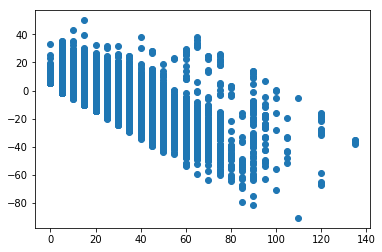

In [180]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test)[:,0] - y_test)




# GET The model to Predict



In [215]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-07-04']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime2.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)

    



[5.719930171966553, 7.88430643081665, 9.739834785461426, 9.936473846435547, 9.652161598205566, 9.423617362976074, 9.195073127746582, 8.867023468017578, 8.538544654846191, 8.265822410583496, 8.016691207885742]


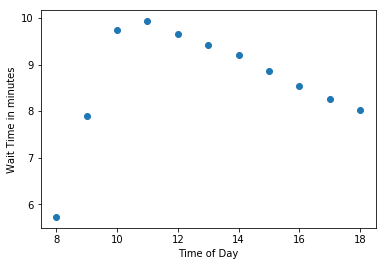

In [217]:
import matplotlib.pyplot as plt
plt.xlabel('Time of Day')
plt.ylabel('Wait Time in minutes')

plt.scatter(time_of_day, waittime2)


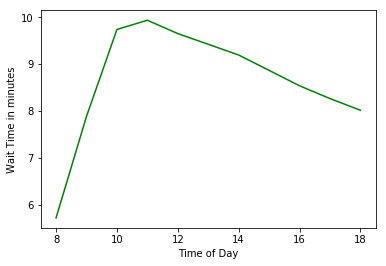

In [218]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime2
#plt.scatter(x, y)

plt.plot(x, y, color="green")
plt.xlabel('Time of Day')
plt.ylabel('Wait Time in minutes')
plt.show()

In [207]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime3=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-05-31']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime3.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime3)



[5.695226669311523, 17.07889175415039, 49.58747482299805, 63.9159049987793, 61.61189651489258, 53.46110916137695, 45.962284088134766, 37.695960998535156, 34.85536193847656, 31.885011672973633, 28.922439575195312]


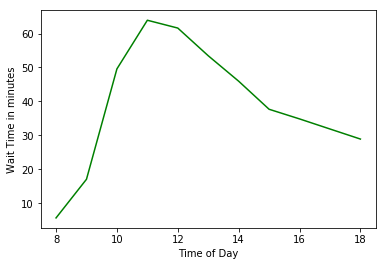

In [209]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime3
#plt.scatter(x, y)

plt.plot(x, y, color="green")
plt.xlabel('Time of Day')
plt.ylabel('Wait Time in minutes')


plt.show()